In [1]:
# !pip install mlxtend


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori , association_rules
from sklearn.preprocessing import LabelEncoder

In [3]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
X = train.drop('satisfaction', axis=1)
train

Train data shape: (103904, 25)
Test data shape: (25976, 25)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [5]:
for i in X.columns:
    X[i] = X[i].astype('str')

# change the categorical data to one hot encoded different columns 
# as the apriori algorithm takes only numerical data 
train_encoded = pd.get_dummies(X)

frequent_itemsets = apriori(train_encoded, min_support=0.35, use_colnames=True)

frequent_itemsets 


d:\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.507459,(Gender_Female)
1,0.492541,(Gender_Male)
2,0.817322,(Customer Type_Loyal Customer)
3,0.689627,(Type of Travel_Business travel)
4,0.477989,(Class_Business)
5,0.449886,(Class_Eco)
6,0.359784,(Baggage handling_4)
7,0.365193,(Inflight service_4)
8,0.564637,(Departure Delay in Minutes_0)
9,0.559738,(Arrival Delay in Minutes_0.0)


In [6]:
rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business travel),0.507459,0.689627,0.351555,0.692776,1.004566,0.001598,1.010250,0.009229
1,(Type of Travel_Business travel),(Gender_Female),0.689627,0.507459,0.351555,0.509776,1.004566,0.001598,1.004727,0.014645
2,(Customer Type_Loyal Customer),(Gender_Male),0.817322,0.492541,0.408695,0.500041,1.015227,0.006130,1.015001,0.082105
3,(Gender_Male),(Customer Type_Loyal Customer),0.492541,0.817322,0.408695,0.829767,1.015227,0.006130,1.073109,0.029557
4,(Customer Type_Loyal Customer),(Class_Business),0.817322,0.477989,0.407193,0.498204,1.042292,0.016522,1.040285,0.222115
5,(Class_Business),(Customer Type_Loyal Customer),0.477989,0.817322,0.407193,0.851888,1.042292,0.016522,1.233376,0.077730
6,(Customer Type_Loyal Customer),(Departure Delay in Minutes_0),0.817322,0.564637,0.461878,0.565112,1.000842,0.000389,1.001093,0.004604
7,(Departure Delay in Minutes_0),(Customer Type_Loyal Customer),0.564637,0.817322,0.461878,0.818010,1.000842,0.000389,1.003781,0.001932
8,(Customer Type_Loyal Customer),(Arrival Delay in Minutes_0.0),0.817322,0.559738,0.458442,0.560908,1.002091,0.000956,1.002665,0.011421
9,(Arrival Delay in Minutes_0.0),(Customer Type_Loyal Customer),0.559738,0.817322,0.458442,0.819031,1.002091,0.000956,1.009443,0.004739


In [7]:
rules_df = rules_df.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
16,"(Customer Type_Loyal Customer, Class_Business)",(Type of Travel_Business travel),0.407193,0.689627,0.386539,0.949278,1.376509,0.105728,6.119093,0.461406
5,(Class_Business),(Customer Type_Loyal Customer),0.477989,0.817322,0.407193,0.851888,1.042292,0.016522,1.233376,0.077730
15,"(Type of Travel_Business travel, Class_Business)",(Customer Type_Loyal Customer),0.457230,0.817322,0.386539,0.845394,1.034347,0.012836,1.181576,0.061180
3,(Gender_Male),(Customer Type_Loyal Customer),0.492541,0.817322,0.408695,0.829767,1.015227,0.006130,1.073109,0.029557
9,(Arrival Delay in Minutes_0.0),(Customer Type_Loyal Customer),0.559738,0.817322,0.458442,0.819031,1.002091,0.000956,1.009443,0.004739
22,"(Departure Delay in Minutes_0, Arrival Delay i...",(Customer Type_Loyal Customer),0.456758,0.817322,0.373701,0.818159,1.001024,0.000382,1.004603,0.001883
7,(Departure Delay in Minutes_0),(Customer Type_Loyal Customer),0.564637,0.817322,0.461878,0.818010,1.000842,0.000389,1.003781,0.001932
13,(Arrival Delay in Minutes_0.0),(Departure Delay in Minutes_0),0.559738,0.564637,0.456758,0.816022,1.445216,0.140710,2.366383,0.699723
21,"(Customer Type_Loyal Customer, Arrival Delay i...",(Departure Delay in Minutes_0),0.458442,0.564637,0.373701,0.815153,1.443677,0.114847,2.355264,0.567482


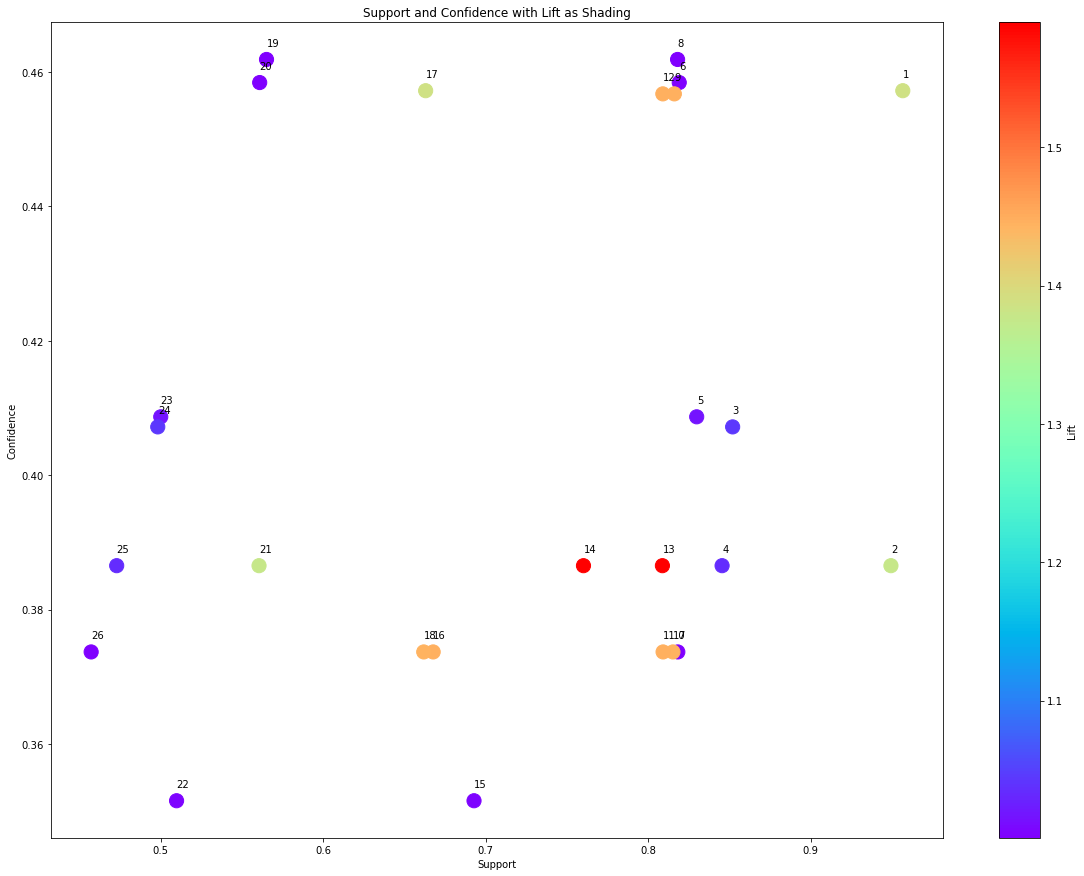

In [8]:
support = rules_df['support'].values
confidence = rules_df['confidence'].values
lift = rules_df['lift'].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap='rainbow', s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i], support[i]+2e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support and Confidence with Lift as Shading')

# Show the plot
plt.show()

# the most important rules are

**1-rule 11**